In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
adult = pd.read_csv("C:/Users/ena88/Downloads/adult.csv")
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,targets
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


In [4]:
adult_df=adult[['age','education-num','capital-gain','capital-loss','hours-per-week','targets']]
adult_df.head(2)

,age,education-num,capital-gain,capital-loss,hours-per-week,targets
0,50,13,0,0,13,0
1,38,9,0,0,40,0


In [5]:
adult_df.describe(include='all')

,age,education-num,capital-gain,capital-loss,hours-per-week,targets
count,30168.000000,30168.000000,30168.000000,30168.000000,30168.000000,30168.000000
mean,38.433738,10.120591,1091.718609,88.354912,40.928368,0.248873
std,13.136338,2.550223,7405.625982,404.260083,11.982219,0.432367
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


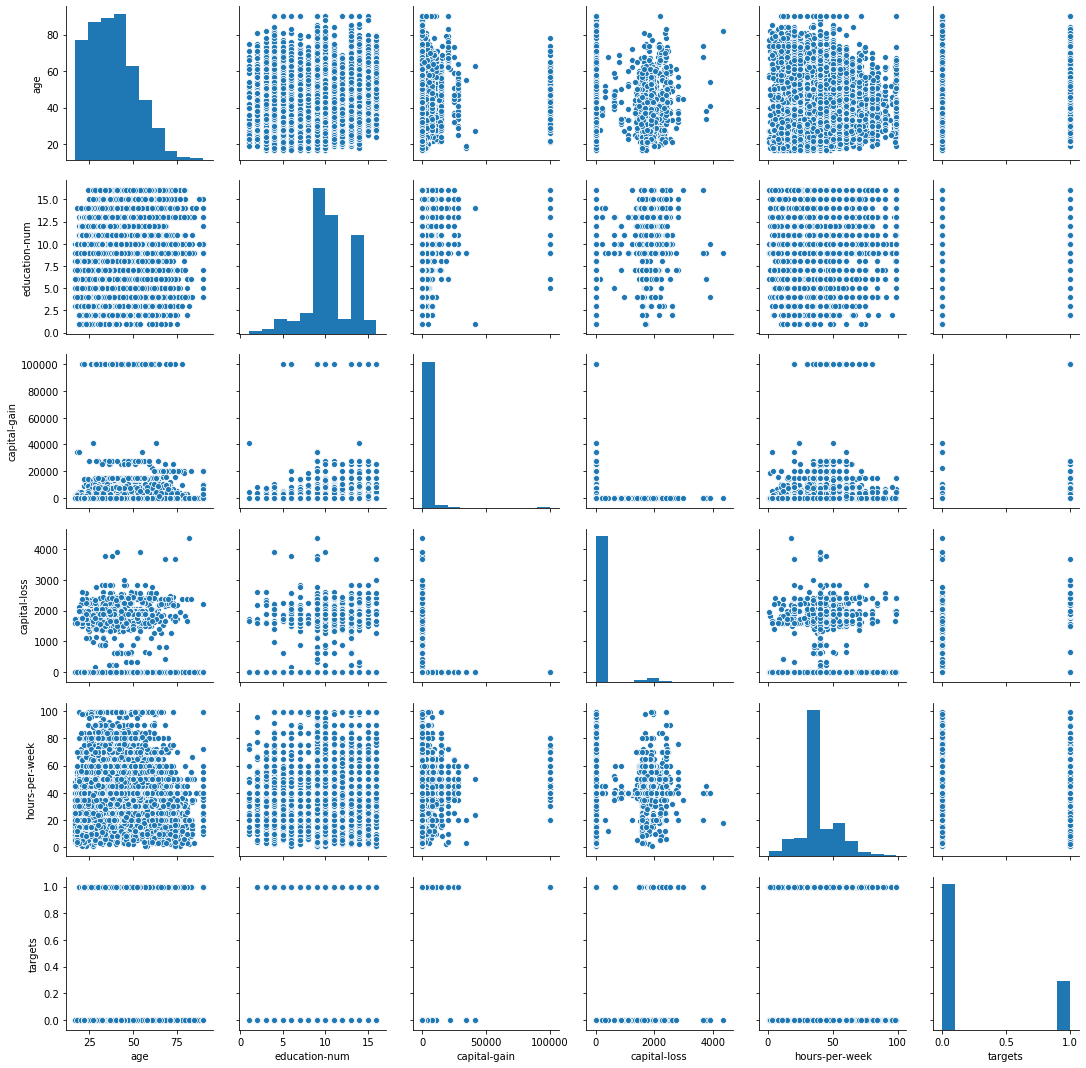

In [6]:
sns.pairplot(adult_df)

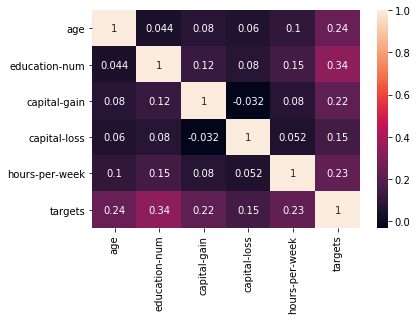

In [7]:
sns.heatmap(adult_df.corr(), annot=True)

In [10]:
# creating input features and target variables
X= adult_df.iloc[:,0:5]
y= adult_df.iloc[:,5]

In [11]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.88049301,  1.12909966, -0.14741991, -0.2185632 , -2.33085624],
       [-0.03301871, -0.43941638, -0.14741991, -0.2185632 , -0.07748007],
       [ 1.10887094, -1.2236744 , -0.14741991, -0.2185632 , -0.07748007],
       ...,
       [ 1.48950082, -0.43941638, -0.14741991, -0.2185632 , -0.07748007],
       [-1.25103433, -0.43941638, -0.14741991, -0.2185632 , -1.7466476 ],
       [ 1.03274496, -0.43941638,  1.88134161, -0.2185632 , -0.07748007]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [17]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=5))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [18]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [19]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
21117/21117 [==============================] - 2s 86us/step - loss: 0.4615 - accuracy: 0.7731
Epoch 2/100
21117/21117 [==============================] - 2s 86us/step - loss: 0.4249 - accuracy: 0.8132
Epoch 3/100
21117/21117 [==============================] - 2s 82us/step - loss: 0.4147 - accuracy: 0.8156
Epoch 4/100
21117/21117 [==============================] - 2s 81us/step - loss: 0.4097 - accuracy: 0.8162
Epoch 5/100
21117/21117 [==============================] - 2s 82us/step - loss: 0.4073 - accuracy: 0.8152
Epoch 6/100
21117/21117 [==============================] - 2s 86us/step - loss: 0.4054 - accuracy: 0.8156
Epoch 7/100
21117/21117 [==============================] - ETA: 0s - loss: 0.4052 - accuracy: 0.81 - 2s 86us/step - loss: 0.4043 - accuracy: 0.8176
Epoch 8/100
21117/21117 [==============================] - 2s 83us/step - loss: 0.4029 - accuracy: 0.8170
Epoch 9/100
21117/21117 [==============================] - 2s 84us/step - loss: 0.4019 - accuracy: 0.8169 0s -

21117/21117 [==============================] - 2s 92us/step - loss: 0.3910 - accuracy: 0.8200
Epoch 77/100
21117/21117 [==============================] - 2s 97us/step - loss: 0.3908 - accuracy: 0.8202
Epoch 78/100
21117/21117 [==============================] - 2s 94us/step - loss: 0.3907 - accuracy: 0.8203
Epoch 79/100
21117/21117 [==============================] - 2s 92us/step - loss: 0.3906 - accuracy: 0.8206
Epoch 80/100
21117/21117 [==============================] - 2s 93us/step - loss: 0.3906 - accuracy: 0.8211
Epoch 81/100
21117/21117 [==============================] - 2s 93us/step - loss: 0.3908 - accuracy: 0.8208
Epoch 82/100
21117/21117 [==============================] - 2s 93us/step - loss: 0.3906 - accuracy: 0.8210
Epoch 83/100
21117/21117 [==============================] - 2s 92us/step - loss: 0.3906 - accuracy: 0.8204
Epoch 84/100
21117/21117 [==============================] - 2s 93us/step - loss: 0.3907 - accuracy: 0.8210
Epoch 85/100
21117/21117 [========================

In [20]:
model=classifier.evaluate(X_train, y_train)
model

21117/21117 [==============================] - 0s 15us/step


[0.39009660623253883, 0.8208552598953247]

In [21]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [22]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6482,  343],
       [1227,  999]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

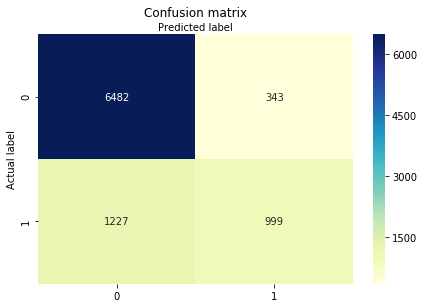

In [23]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8265385040327036
Precision: 0.7444113263785395
Recall: 0.44878706199460916


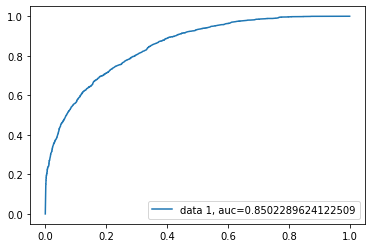

In [25]:
y_pred_proba = classifier.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [26]:
from sklearn.metrics import zero_one_loss
error_rate= zero_one_loss(y_test, y_pred)

In [27]:
error_rate

0.17346149596729643